[nltk_data] Downloading package stopwords to /Users/Joao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


             Word  Frequency
38           look        192
7       beautiful        163
47          place         90
88           city         66
63           nice         60
1           clean         60
18   architecture         58
67          water         45
76    interesting         41
48           seem         40
29            see         40
112      building         39
35           view         35
46          dubai         31
54          visit         31
37          beach         30
49        amazing         30
45          hotel         26
99        weather         25
59           many         22


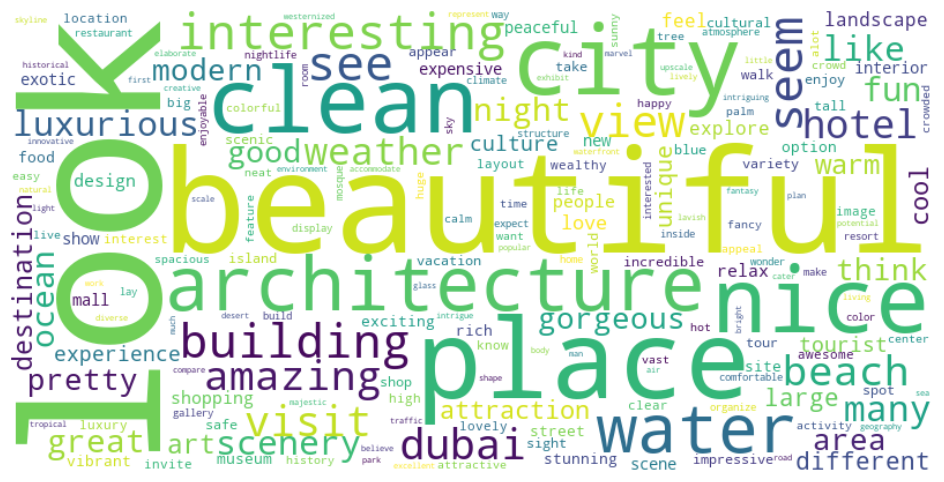

In [9]:
# Import necessary libraries
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords from NLTK
nltk.download('stopwords')

# Load English stopwords and the SpaCy language model
stop_words = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")

# Load the Excel file and preprocess text data
df = pd.read_excel('raw_datadesquality.xlsx')
texts = df['Destination Quality'].dropna().astype(str).tolist()
raw_text = " ".join(texts)  # Combine all text into one string

# Process text with SpaCy NLP pipeline
doc = nlp(raw_text.lower())

# Define a set of low-value or "nettlesome" words to exclude
nettlesome_words = {
    "thing", "stuff", "say", "use", "get", "really", "well",
    "also", "may", "could", "would", "one", "two", "lot"
}

# Specify parts of speech to keep: nouns, adjectives, and verbs
important_pos = {"NOUN", "ADJ", "VERB"}

# Filter and lemmatize tokens based on multiple criteria
tokens = [
    token.lemma_ for token in doc
    if (
        token.is_alpha and
        token.lemma_ not in stop_words and
        len(token.lemma_) > 2 and
        token.lemma_ not in nettlesome_words and
        token.pos_ in important_pos
    )
]

# Count word frequencies
freq = Counter(tokens)

# Convert word frequency data to a DataFrame and sort
freq_df = pd.DataFrame(freq.items(), columns=['Word', 'Frequency'])
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

# Display the top 20 words
print(freq_df.head(20))

# Save the frequency table to CSV
freq_df.to_csv('des_quality_word_frequencies.csv', index=False)

# Plot and save the frequency table as an image
fig, ax = plt.subplots(figsize=(8, len(freq_df)*0.25 + 1))
ax.axis('off')
tbl = ax.table(cellText=freq_df.values, colLabels=freq_df.columns, cellLoc='center', loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.auto_set_column_width(col=list(range(len(freq_df.columns))))
plt.savefig('des_quality_word_frequencies_table.png', bbox_inches='tight', dpi=300)
plt.close()

# Generate word cloud from word frequencies
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    colormap='viridis' 
).generate_from_frequencies(freq)

# Save word cloud image
wordcloud.to_file("des_quality_wordcloud.png")

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
